In [2]:
'''
Jupyter interactive libraries

'''
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from ipywidgets import *
from ipywidgets import widget

'''
Data munging libraries

'''
import pandas as pd
import numpy as np
from tkinter import Tk
from tkinter import filedialog as fd

'''
Visualization Libraries

'''
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#%matplotlib notebook
pd.set_option('display.max_columns', 100)
pd.set_option('display.precision', 2) 
from bokeh.plotting import figure, output_notebook, show, gridplot
from bokeh.layouts import row
'''
ML libraries

'''
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RANSACRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import LinearRegression
output_notebook();

Loading BokehJS ...

In [3]:
filename="DATA/engine_data_ransac.csv"
newTable=pd.read_csv(filename,header=0,encoding="ISO-8859-2")
flight_df=newTable[newTable["Thrust"]>=50]

In [4]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60704 entries, 0 to 64631
Data columns (total 12 columns):
Test Cell Sequence    60704 non-null int64
T48                   60704 non-null float64
P3                    60704 non-null float64
T3                    60704 non-null float64
VIGV                  60704 non-null float64
T2                    60704 non-null float64
Fuel                  60704 non-null float64
Flight_Mode           60704 non-null object
Thrust                60704 non-null float64
Exh_Temp              60704 non-null float64
Vibration 1           60704 non-null float64
Vibration 2           60704 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 6.0+ MB


In [5]:
X_train=flight_df[(flight_df["Flight_Mode"]=="Cruise")]["T2"].values.reshape(-1,1)
y_train=flight_df[(flight_df["Flight_Mode"]=="Cruise")]["Thrust"].values;

In [6]:
lnreg = LinearRegression()
lnreg= lnreg.fit(X_train, y_train)
y_train_pred = lnreg.predict(X_train);

In [7]:
df=flight_df[(flight_df["Flight_Mode"]=="Cruise")]
df=df.assign(Predicted = lambda x: y_train_pred)

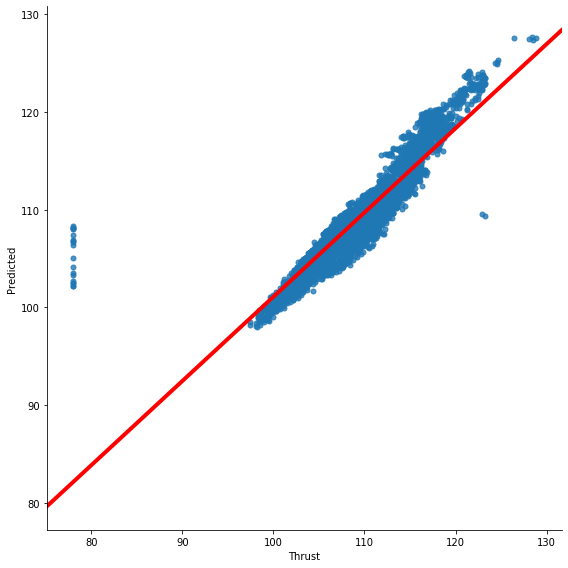

In [9]:
sns.lmplot(x="Thrust", y="Predicted", data=df, height=8,fit_reg=True,scatter_kws={"s": 25},
           line_kws={"color":"red","linewidth":4},ci=None);

In [10]:
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=200, 
                         min_samples=200, 
                         loss='absolute_loss', 
                         residual_threshold=10.0, 
                         random_state=0)

In [11]:
ransac=ransac.fit(X_train, y_train)

In [12]:
y_train_pred=ransac.predict(X_train)

In [13]:
df=flight_df[(flight_df["Flight_Mode"]=="Cruise")]
df=df.assign(Predicted = lambda x: y_train_pred)

In [14]:
inlier_mask = ransac.inlier_mask_

In [15]:
df=df.assign(normal = lambda x: inlier_mask)

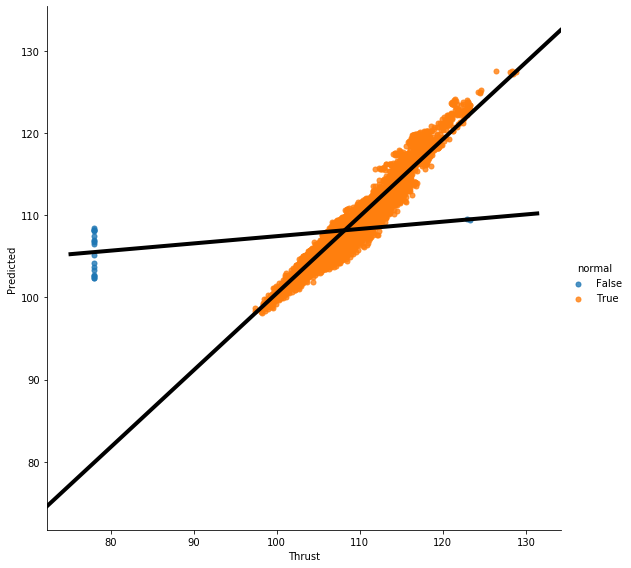

In [18]:
sns.lmplot(x="Thrust", y="Predicted", data=df,hue="normal", height=8,fit_reg=True,scatter_kws={"s": 25},
           line_kws={"color":"black","linewidth":4},ci=None);

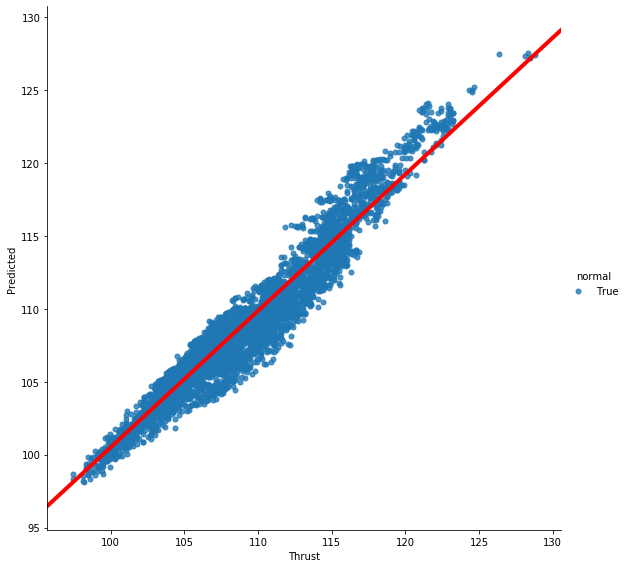

In [19]:
sns.lmplot(x="Thrust", y="Predicted", data=df[df['normal']==True],hue="normal", height=8,fit_reg=True,scatter_kws={"s": 25},
           line_kws={"color":"red","linewidth":4},ci=None);

<!--NAVIGATION-->
##### <[Intro-Scikit and Pipelines](_01_Intro-Scikit_and_Pipelines.ipynb) |  [Home ](Index.ipynb)|   [Keras-Tensorflow and Recurrent Neural Networks](_03_Intro_RNN_LSTM.ipynb)>